In [68]:
# Mengimport library yang dibutuhkan
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
#Agar plots tampil inline
%matplotlib inline

import seaborn as sns

In [69]:
#Membaca Dataset
price_df = pd.read_csv('archive/restaurant-1-products-price.csv')
price_df.head()
orders_df = pd.read_csv('archive/restaurant-1-orders.csv')
orders_df.head(10)

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6
5,16118,03/08/2019 20:25,Mango Chutney,1,0.50,6
6,16117,03/08/2019 20:17,Plain Naan,1,2.60,7
7,16117,03/08/2019 20:17,Mushroom Rice,1,3.95,7
8,16117,03/08/2019 20:17,Tandoori Chicken (1/4),1,4.95,7
9,16117,03/08/2019 20:17,Vindaloo - Lamb,1,7.95,7


In [70]:
#Menampilkan info data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Number    74818 non-null  int64  
 1   Order Date      74818 non-null  object 
 2   Item Name       74818 non-null  object 
 3   Quantity        74818 non-null  int64  
 4   Product Price   74818 non-null  float64
 5   Total products  74818 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.4+ MB


In [71]:
#Menampilkan missing value(s) pada kolom data
orders_df.isnull().any()

Order Number      False
Order Date        False
Item Name         False
Quantity          False
Product Price     False
Total products    False
dtype: bool

In [72]:
# Mengubah format pada 'Order Date'
try:
    orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'])
except:
    pass

In [73]:
# Mengubah nama kolom 'Total products'
orders_df = orders_df.rename(columns={'Total products': 'Total Products'})
orders_df.head(10)

,Order Number,Order Date,Item Name,Quantity,Product Price,Total Products
0,16118,2019-03-08 20:25:00,Plain Papadum,2,0.80,6
1,16118,2019-03-08 20:25:00,King Prawn Balti,1,12.95,6
2,16118,2019-03-08 20:25:00,Garlic Naan,1,2.95,6
3,16118,2019-03-08 20:25:00,Mushroom Rice,1,3.95,6
4,16118,2019-03-08 20:25:00,Paneer Tikka Masala,1,8.95,6
5,16118,2019-03-08 20:25:00,Mango Chutney,1,0.50,6
6,16117,2019-03-08 20:17:00,Plain Naan,1,2.60,7
7,16117,2019-03-08 20:17:00,Mushroom Rice,1,3.95,7
8,16117,2019-03-08 20:17:00,Tandoori Chicken (1/4),1,4.95,7
9,16117,2019-03-08 20:17:00,Vindaloo - Lamb,1,7.95,7


In [74]:
# Menampilkan perhitungan basic statistics untuk setiap kolom yang bernilai numeric
orders_df.describe()

,Order Number,Quantity,Product Price,Total Products
count,74818.000000,74818.000000,74818.000000,74818.000000
mean,9115.638162,1.243564,5.286492,6.931434
std,4052.210452,0.798207,3.338221,3.954832
min,630.000000,1.000000,0.500000,1.000000
25%,5590.000000,1.000000,2.950000,5.000000
50%,9103.000000,1.000000,3.950000,6.000000
75%,12630.000000,1.000000,8.950000,8.000000
max,16118.000000,51.000000,17.950000,60.000000


In [75]:
# Menampilkan Tanggal dan Waktu pesanan pertama dan pesanan terakhir
print(orders_df['Order Date'].min())
print(orders_df['Order Date'].max())

2015-01-09 14:42:00
2019-12-07 22:24:00


## Data Visualization

## Recommendation

In [77]:
df_order_items = orders_df[['Order Number','Item Name']].rename(columns={'Order Number':'order_id','Item Name':'item'})
df_order_items['flag'] = 1
df_order_items.head(10)

,order_id,item,flag
0,16118,Plain Papadum,1
1,16118,King Prawn Balti,1
2,16118,Garlic Naan,1
3,16118,Mushroom Rice,1
4,16118,Paneer Tikka Masala,1
5,16118,Mango Chutney,1
6,16117,Plain Naan,1
7,16117,Mushroom Rice,1
8,16117,Tandoori Chicken (1/4),1
9,16117,Vindaloo - Lamb,1


In [78]:
# Membuat pivot tabel
df_order_pivot = pd.pivot_table(data = df_order_items,
              index = 'order_id',
              columns = 'item').fillna(0)
print(df_order_pivot.shape)
df_order_pivot.head(20)

(13397, 248)


flag                                          \
item     Aloo Chaat Aloo Gobi Aloo Methi Baingan Hari Mirch   
order_id                                                      
630             0.0       0.0        0.0                0.0   
647             0.0       0.0        0.0                0.0   
648             0.0       0.0        0.0                0.0   
651             0.0       0.0        0.0                0.0   
764             0.0       0.0        0.0                0.0   
838             0.0       0.0        0.0                0.0   
840             0.0       0.0        0.0                0.0   
857             0.0       0.0        0.0                0.0   
874             0.0       0.0        0.0                0.0   
894             0.0       0.0        0.0                0.0   
1212            0.0       0.0        0.0                0.0   
1216            0.0       0.0        0.0                0.0   
1219            0.0       0.0        0.0                0.0   
1220            0.0       0.0        0.0                0.0   
1221            0.0       0.0        0.0                0.0   
1222            0.0       0.0        0.0                0.0   
1223            0.0       0.0        0.0                0.0   
1375            0.0       0.0        0.0                0.0   
1376            0.0       0.0        0.0                0.0   
1382            0.0       0.0        0.0                0.0   

                                                                 \
item     Bengal Fish Biryani Bengal Fish Karahi Bengal Fry Fish   
order_id                                                          
630                      0.0                0.0             0.0   
647                      0.0                0.0             0.0   
648                      0.0                0.0             0.0   
651                      0.0                0.0             0.0   
764                      0.0                0.0             0.0   
838                      0.0                0.0             0.0   
840                      0.0                0.0             0.0   
857                      0.0                0.0             0.0   
874                      0.0                0.0             0.0   
894                      0.0                0.0             0.0   
1212                     0.0                0.0             0.0   
1216                     0.0                0.0             0.0   
1219                     0.0                0.0             0.0   
1220                     0.0                0.0             0.0   
1221                     0.0                0.0             0.0   
1222                     0.0                0.0             0.0   
1223                     0.0                0.0             0.0   
1375                     0.0                0.0             0.0   
1376                     0.0                0.0             0.0   
1382                     0.0                0.0             0.0   

                                                       ...                 \
item     Bengal King Prawn Bengal Salad Bhindi Bhajee  ... Vegetable Rice   
order_id                                               ...                  
630                    0.0          0.0           0.0  ...            0.0   
647                    0.0          0.0           0.0  ...            0.0   
648                    0.0          0.0           0.0  ...            0.0   
651                    0.0          0.0           0.0  ...            0.0   
764                    0.0          0.0           0.0  ...            0.0   
838                    0.0          0.0           0.0  ...            0.0   
840                    0.0          0.0           0.0  ...            0.0   
857                    0.0          0.0           0.0  ...            0.0   
874                    0.0          0.0           0.0  ...            0.0   
894                    0.0          0.0           0.0  ...            0.0   
1212                  

In [79]:
# Menampilkan plot korelasi antar item
df_corr_dishes = df_order_pivot.corr()
df_corr_dishes.columns = df_corr_dishes.columns.droplevel()
df_corr_dishes.reset_index(level=0, drop=True, inplace = True)
df_corr_dishes

item,Aloo Chaat,Aloo Gobi,Aloo Methi,Baingan Hari Mirch,Bengal Fish Biryani,Bengal Fish Karahi,Bengal Fry Fish,Bengal King Prawn,Bengal Salad,Bhindi Bhajee,...,Vegetable Rice,Vegetable Roll,Vegetable Samosa,Vindaloo,Vindaloo - Chicken,Vindaloo - Chicken Tikka,Vindaloo - King Prawn,Vindaloo - Lamb,Vindaloo - Prawn,Vindaloo Sauce
item,,,,,,,,,,,,,,,,,,,,,
Aloo Chaat,1.000000,-0.014949,0.009666,0.012279,0.001895,-0.005398,-0.006103,-0.000845,-0.010589,0.000156,...,-0.003725,0.146762,-0.004219,-0.004834,-0.009808,0.009310,0.031448,-0.009362,-0.004022,0.000723
Aloo Gobi,-0.014949,1.000000,0.012344,0.008919,-0.011699,-0.008046,-0.000481,-0.002624,-0.005817,0.006148,...,0.006888,-0.010189,-0.006288,0.054549,0.041517,0.002200,-0.009096,-0.008325,-0.005995,0.043530
Aloo Methi,0.009666,0.012344,1.000000,0.036468,-0.003062,-0.002106,-0.002381,-0.005003,0.032321,0.022223,...,-0.002111,-0.008478,-0.001646,0.001795,0.007133,-0.002046,-0.002381,-0.003652,-0.001569,0.011365
Baingan Hari Mirch,0.012279,0.008919,0.036468,1.000000,-0.006499,0.029474,-0.005053,0.003754,-0.000082,0.097648,...,0.004967,-0.005093,-0.003493,-0.012122,-0.006206,-0.004343,0.009964,-0.007752,-0.003330,0.012994
Bengal Fish Biryani,0.001895,-0.011699,-0.003062,-0.006499,1.000000,0.036360,0.031691,-0.004648,-0.003837,-0.007111,...,0.015941,0.021253,-0.001529,-0.007325,-0.005421,-0.001901,-0.002212,-0.003393,-0.001458,-0.004362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vindaloo - Chicken Tikka,0.009310,0.002200,-0.002046,-0.004343,-0.001901,-0.001307,-0.001478,0.021133,-0.002565,-0.004753,...,-0.006148,-0.005265,-0.001022,-0.004895,0.017218,1.000000,0.049170,0.030825,0.075800,-0.002915
Vindaloo - King Prawn,0.031448,-0.009096,-0.002381,0.009964,-0.002212,-0.001521,-0.001720,0.058919,-0.002984,-0.005529,...,-0.007152,-0.006125,-0.001189,-0.005695,0.031628,0.049170,1.000000,0.025819,0.064886,-0.003391
Vindaloo - Lamb,-0.009362,-0.008325,-0.003652,-0.007752,-0.003393,-0.002333,-0.002638,-0.005545,0.011881,0.000511,...,-0.010972,-0.009396,-0.001824,-0.008737,0.087213,0.030825,0.025819,1.000000,0.041398,-0.005202


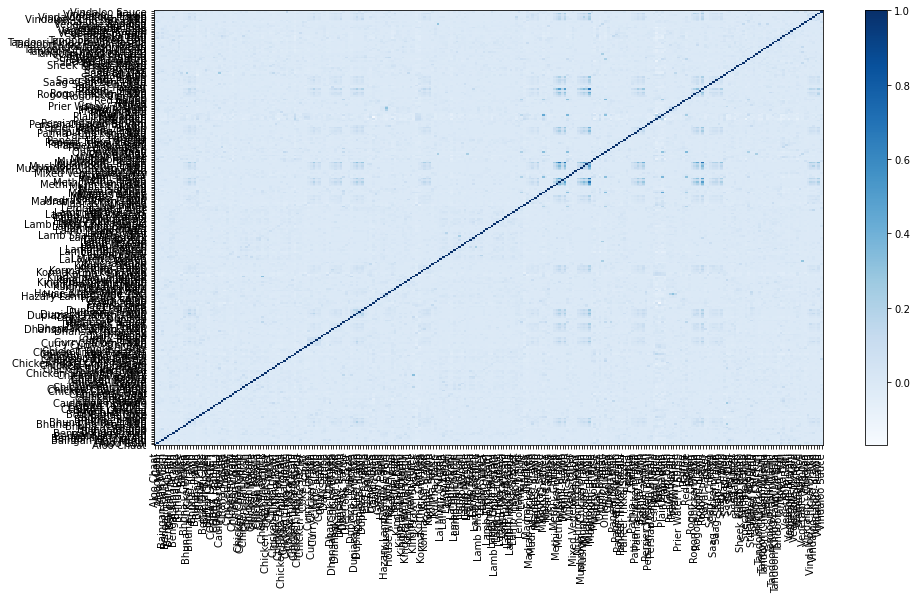

In [80]:
# Menampilkan gambar dari plot korelasi antar item
fig, ax = plt.subplots()
im = ax.pcolor(df_corr_dishes, cmap='Blues')

row_labels = df_corr_dishes.columns
col_labels = df_corr_dishes.index

# Memindahkan ticks dan Label ke center
ax.set_xticks(np.arange(df_corr_dishes.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_corr_dishes.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
plt.xticks(rotation=90)

fig.set_size_inches(15,8)
fig.colorbar(im)
plt.show()

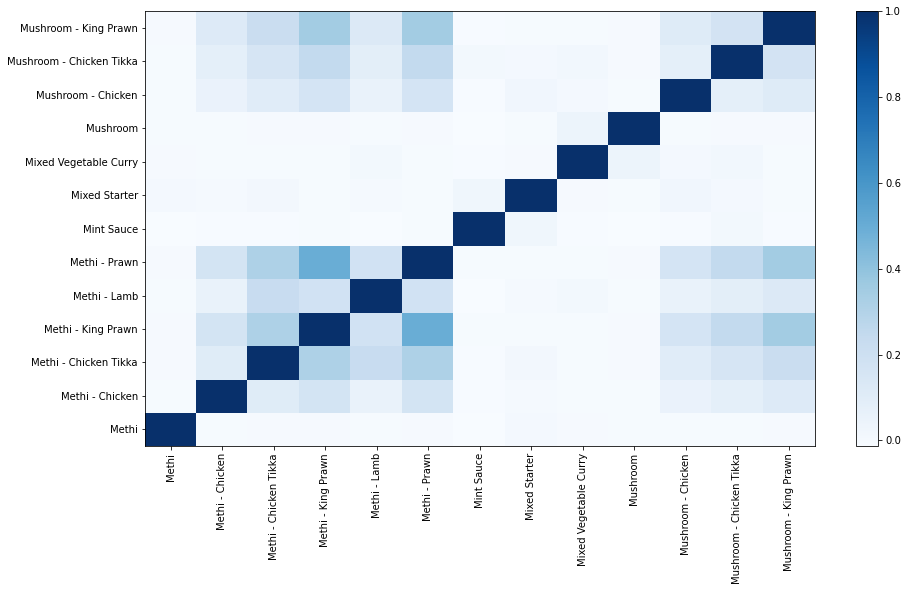

In [81]:
# Menampilkan gambar dari plot korelasi sebagian antar item
corr_dishes_head = df_corr_dishes.iloc[147:160,147:160]
fig, ax = plt.subplots()
im = ax.pcolor(corr_dishes_head, cmap='Blues')

row_labels = corr_dishes_head.columns
col_labels = corr_dishes_head.index

ax.set_xticks(np.arange(corr_dishes_head.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(corr_dishes_head.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
plt.xticks(rotation=90)

fig.set_size_inches(15,8)
fig.colorbar(im)
plt.show()

In [82]:
# Fungsi Rekomendasi
# Pilih salah satu menu secara acak
dish_to_recommend_to = ['Vegetable Roll']

def return_recommended_dishes(df_corr_dishes, dish_to_recommend_to):
    
    df_recommend_output = df_corr_dishes[dish_to_recommend_to]
    df_recommend_output['Total Corellation'] = df_recommend_output.mean(axis = 1)

    # sort by score
    df_recommend_output.sort_values(by= 'Total Corellation', ascending = False, inplace = True)

    # Memindahkan item pertama, sebagaimana sudah dipilih oleh pembeli
    df_recommend_output = df_recommend_output.iloc[2:,:]

    # Menampilkan total korelasi
    df_recommend_output[['Total Corellation']].head(10)
    
    return df_recommend_output[['Total Corellation']]

df_recommended_dishes = return_recommended_dishes(df_corr_dishes, dish_to_recommend_to = ['Vegetable Roll'])
df_recommended_dishes.head(10)

item,Total Corellation
item,
Onion Bhajee,0.096599
Meat Samosa,0.095323
Bhuna - Chicken Tikka,0.049197
Coke 1.5 ltr,0.048086
House white wine 75cl,0.035472
French Fries,0.034133
King Prawn Balti,0.033309
Bhuna - Chicken,0.033266
King Prawn Butterfly,0.032076


In [83]:
df_recommended_dishes = return_recommended_dishes(df_corr_dishes, dish_to_recommend_to = ['Meat Samosa'])
df_recommended_dishes.head(10)

item,Total Corellation
item,
Vegetable Roll,0.095323
Aloo Chaat,0.088694
Onion Bhajee,0.085017
Sheek Kebab (Main),0.070353
Dhansak,0.056424
Korma Sauce,0.055748
Chicken Pakora,0.053522
Sheek Kebab,0.044943
House Red wine 75cl,0.041067


## Top Menu

In [84]:
# Menampilkan 10 Item teratas yang paling banyak dipesan
df_item_popularity = orders_df.groupby(by='Item Name').Quantity.sum().sort_values(ascending=False)
top_ten = df_item_popularity.head(10)
top_ten

Item Name
Plain Papadum           10648
Pilau Rice               6367
Plain Naan               4983
Garlic Naan              3318
Plain Rice               2964
Onion Bhajee             2749
Mango Chutney            2504
Chicken Tikka Masala     2473
Chapati                  1935
Mint Sauce               1840
Name: Quantity, dtype: int64

Text(0.5, 0, 'Total Selling Item')

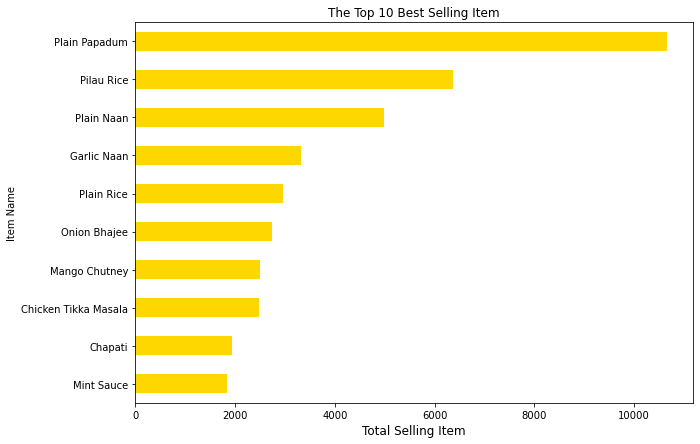

In [85]:
top_sort = top_ten.sort_values(ascending=True)
ax = top_sort.plot.barh(y='Item Name', figsize= (10,7), color='gold')
ax.set_title("The Top 10 Best Selling Item")
ax.set_xlabel('Total Selling Item', fontsize=12)